In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [16]:
dataset = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
dataset = dataset.drop(columns = ["customerID"])

In [18]:
binary_cols = ["Partner","Dependents","PhoneService","OnlineSecurity","DeviceProtection","TechSupport","OnlineBackup","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in binary_cols:
    print(col,":",dataset[col].unique())

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
PaperlessBilling : ['Yes' 'No']
Churn : ['No' 'Yes']


In [21]:
binary_cols1 = ["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
binary_cols2 = ["OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","OnlineBackup","StreamingMovies"]

for col1 in binary_cols1:
    dataset[col1] = dataset[col1].replace({"Yes":1,"No":0}).astype(int)
    print(dataset[col1].unique())

for col2 in binary_cols2:
    dataset[col2] = dataset[col2].replace({"Yes":1,"No":0,"No internet service":0}).astype(int)
    print(dataset[col2].unique())



[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [22]:
binary_cols3 = ["MultipleLines","InternetService","Contract","PaymentMethod"]
dataset = pd.get_dummies(dataset,columns = binary_cols3,drop_first = True)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,0,...,0,True,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,1,0,1,0,...,0,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,1,0,0,...,1,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,1,0,1,1,...,0,True,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,1,False,False,True,False,False,False,False,True,False


In [23]:
dataset.nunique()
dataset.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year   

In [26]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"].replace(' ', np.nan), errors='coerce').fillna(0)
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

In [27]:
print(dataset["TotalCharges"].dtype)         # float64 olmalı
print(dataset["TotalCharges"].isnull().sum())

float64
0


In [28]:
dataset = dataset.astype({col: int for col in dataset.select_dtypes(include='bool').columns})

In [29]:
from sklearn.model_selection import train_test_split

x = dataset.drop(columns = "Churn")
y = dataset["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [30]:
dataset.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year   

In [31]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

## STANDARD SCALER AND LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

log_res = LogisticRegression(max_iter = 100)
log_res.fit(x_train_scaler,y_train)
y_pred_logres = log_res.predict(x_test_scaler)

## DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

des_tree = DecisionTreeClassifier(max_depth = 2)
des_tree.fit(x_train,y_train)
y_pred_destree = des_tree.predict(x_test)

## RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_estimators = 100)
ran_for.fit(x_train,y_train)
y_pred_ranfor = ran_for.predict(x_test)

## XGBOOST

In [52]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss",random_state=0)
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)

## LIGHTGBM

In [80]:
from lightgbm import LGBMClassifier as LGBM

lgbm_model = LGBM()
lgbm_model.fit(x_train,y_train)
y_pred_lgbm = lgbm_model.predict(x_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1501, number of negative: 4133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266418 -> initscore=-1.012872
[LightGBM] [Info] Start training from score -1.012872


In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

model_list = {"Logistic Regressor":log_res,
               "Desicion Tree":des_tree,
               "Random Forest":ran_for,
               "XGBoost":xgb_model,
               "LightGBM":lgbm_model}

for name, model in model_list.items():
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print(f"\n{name} Sonuçları:")
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision: ",precision_score(y_test,y_pred))
    print("Recall: ",recall_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))
    print("ROC AUC: ",roc_auc_score(y_test,y_pred))


Logistic Regressor Sonuçları:
Accuracy:  0.26330731014904185
Precision:  0.26173541963015645
Recall:  1.0
F1 Score:  0.41488162344983087
ROC AUC:  0.5014409221902018

Desicion Tree Sonuçları:
Accuracy:  0.7835344215755855
Precision:  0.6521739130434783
Recall:  0.36684782608695654
F1 Score:  0.46956521739130436
ROC AUC:  0.6488417804786368

Random Forest Sonuçları:
Accuracy:  0.7799858055358411
Precision:  0.605072463768116
Recall:  0.453804347826087
F1 Score:  0.5186335403726708
ROC AUC:  0.6745486676690473

XGBoost Sonuçları:
Accuracy:  0.7764371894960965
Precision:  0.5892255892255892
Recall:  0.47554347826086957
F1 Score:  0.5263157894736842
ROC AUC:  0.6791742367288979

LightGBM Sonuçları:
Accuracy:  0.7835344215755855
Precision:  0.6075085324232082
Recall:  0.483695652173913
F1 Score:  0.5385779122541604
ROC AUC:  0.686612475462557


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## TENSORFLOW

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC

model = keras.Sequential([
    layers.Dense(64,activation="relu",input_shape=(x_train_scaler.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1,activation="sigmoid")
    ])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics =["accuracy",AUC(name="auc")]
)

history= model.fit(
    x_train,y_train,
    epochs=50,
    batch_size = 32,
    validation_split =0.2,
    verbose = 1
)

loss,accuracy,auc = model.evaluate(x_test_scaler,y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6335 - auc: 0.5378 - loss: 53.7264 - val_accuracy: 0.6673 - val_auc: 0.8157 - val_loss: 0.6680
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - auc: 0.5916 - loss: 12.6586 - val_accuracy: 0.7489 - val_auc: 0.6779 - val_loss: 0.5579
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - auc: 0.5970 - loss: 3.2781 - val_accuracy: 0.7711 - val_auc: 0.6773 - val_loss: 0.5445
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - auc: 0.6078 - loss: 1.5330 - val_accuracy: 0.7524 - val_auc: 0.6746 - val_loss: 0.5835
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - auc: 0.6052 - loss: 1.0454 - val_accuracy: 0.7524 - val_auc: 0.6742 - val_loss: 0.5408
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - auc: 0.6093 - loss: 0.7615 - val_accuracy: 0.7524 - val_auc: 0.6815 - val_loss: 0.5737
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

Text(0.5, 1.0, 'Eğitim ve Doğrulama Grafiği')

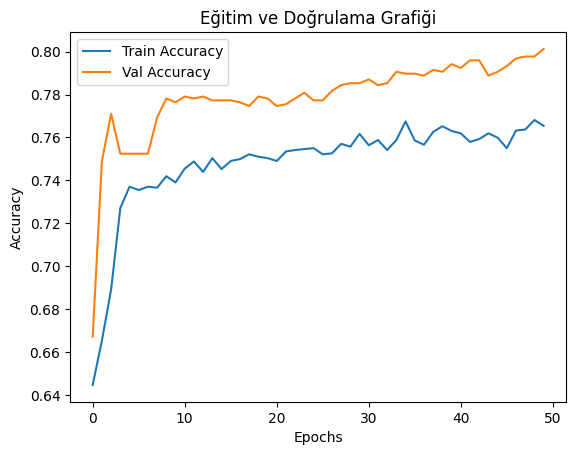

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Eğitim ve Doğrulama Grafiği")